In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

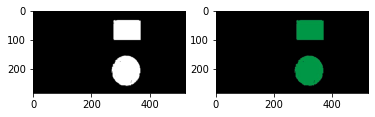

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figColores.jpg")
img_hsv = cv.cvtColor(image, cv.COLOR_RGB2HSV)

#Primer umbral del color verde en HSV
umbral_bajo1 = (55,100,100)
umbral_alto1 = (65,255,255)

#Segundo umbral del color verde en HSV
umbral_bajo2 = (65,100,100)
umbral_alto2 = (75,255,255)

#Se aplica la mascara y se filtra en la original
#Con la mascara 1 si encuentra el color, de lo contraio 0
mask1 = cv.inRange(img_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv.inRange(img_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv.bitwise_and(image, image, mask=mask)

#Se muestran los resultados
plt.subplot(1, 2, 1) # 1 fila, 2 columnas y crea ejes en la posición 1
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

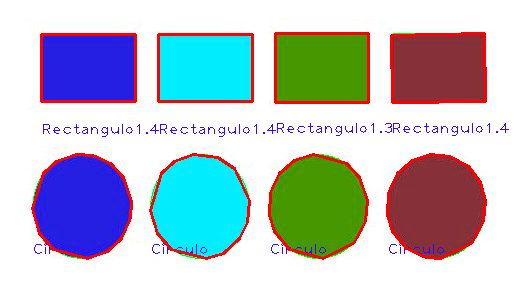

In [ ]:
#DETECCION DE BORDES
from google.colab.patches import cv2_imshow
image = io.imread("/content/drive/MyDrive/GoogleColab/figColores.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

#Detección de bordes con Canny --- (Imagen_gris, umbral_min, umbral_max)
canny = cv.Canny(gray, 14, 150)

#Mejoramiento de la imagen aplicando Dilate (dilatación) y Erode(erosión)
#Dilatación agrega pixeles al borde y Erosión los quita
canny = cv.dilate(canny, None, iterations=1)
canny = cv.erode(canny, None, iterations=1)

cnts,_ = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#-1 significa dibuje todos los contornos
cv.drawContours(image, cnts, -1, (0,255,0), 1)

for c in cnts:
  #Epsilon al 1%, muy preciso, si aumenta, disminuye la precisión
  #Perimetro
  epsilon = 0.01*cv.arcLength(c,True)
  #Aproximación a poligono de forma conocida
  approx = cv.approxPolyDP(c,epsilon,True)
  #vertices encontrados en la figura
  x,y,w,h = cv.boundingRect(approx)
  
  #parametros de putText
  coloText = [255,10,50]
  grosor = 1
  escala = 1.02
  letra =1
 
  if len(approx)==3:
    cv.putText(image,'Triangulo', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==4:
    aspect_ratio = round(float(w)/h,1)
    #print('aspect_ratio= ', round(aspect_ratio,1))
    if aspect_ratio == 1:
      cv.putText(image,('Cuadrado '+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
    else:
      cv.putText(image,('Rectangulo'+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==5:
    cv.putText(image,'Pentagono', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==6:
    cv.putText(image,'Hexagono', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)>10 and :
    cv.putText(image,'Circulo', (x,y+100),letra,escala,(coloText),grosor)
  
  #parametros de drawContourns
  colorC = [0,0,255]
  grosorC =2
  
  cv.drawContours(image, [approx], 0, colorC, grosorC)

cv2_imshow(image)

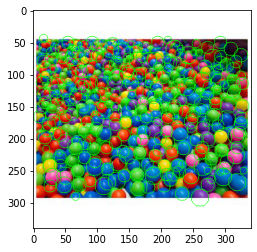

In [ ]:
image = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel. difumina la imagen para agrupar mas 
#  tonos en un mismo circulo
gray_blurred = cv.blur(gray, (1, 1))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred,
                                   cv.HOUGH_GRADIENT, 
                                   1, #dp
                                   8, #distancia minima entre puntos
                                   param1 = 20,
                                   param2 = 15, #cuanto mas pequeño, mayor cant de circulo
                                   minRadius = 2, 
                                   maxRadius = 15)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 1)

    
    #cv2_imshow(image)
    plt.imshow(image)
    cv.imwrite("/content/drive/MyDrive/GoogleColab/PelotasID_1.jpg",image)

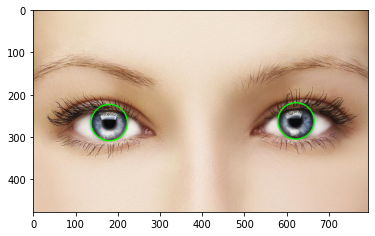

In [ ]:
"""sin blur"""

image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
#gray_blurred = cv.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray,
                                   cv.HOUGH_GRADIENT, 
                                   1, 
                                   400, 
                                   param1 = 50,
                                   param2 = 48, 
                                   minRadius = 1, 
                                   maxRadius = 50)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (255, 0, 0), 2)

    
    #cv2_imshow(image)
    plt.imshow(image)

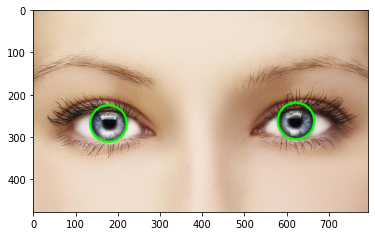

In [ ]:
"""con blur"""

image = io.imread("/content/drive/MyDrive/GoogleColab/figOjos.jpg")
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv.blur(gray, (7, 7))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred,
                                   cv.HOUGH_GRADIENT, 
                                   1, 
                                   200, 
                                   param1 = 50,
                                   param2 = 20, 
                                   minRadius = 1, 
                                   maxRadius = 50)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 3)

    
    #cv2_imshow(image)
    plt.imshow(image)

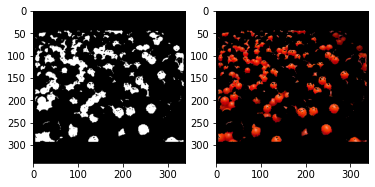

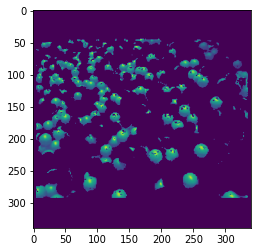

In [ ]:
pelotas = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
pelotas_hsv = cv.cvtColor(pelotas, cv.COLOR_RGB2HSV)

#Primer umbral del color verde en HSV
umbral_bajo1 = (0,100,100)
umbral_alto1 = (10,255,255)

#Segundo umbral del color verde en HSV
umbral_bajo2 = (175,100,100)
umbral_alto2 = (180,255,255)

#Se aplica la mascara y se filtra en la original
#Con la mascara 1 si encuentra el color, de lo contraio 0
mask1 = cv.inRange(pelotas_hsv, umbral_bajo1, umbral_alto1)
mask2 = cv.inRange(pelotas_hsv, umbral_bajo2, umbral_alto2)
mask = mask1 + mask2
res = cv.bitwise_and(pelotas, pelotas, mask=mask)

#Se muestran los resultados
plt.subplot(1, 2, 1) # 1 fila, 2 columnas y crea ejes en la posición 1
plt.imshow(mask, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(res)
plt.show()

#image = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")

# Convert to grayscale.
gray = cv.cvtColor(res, cv.COLOR_RGB2GRAY)
  
# Blur using 3 * 3 kernel. difumina la imagen para agrupar mas 
#  tonos en un mismo circulo
gray_blurred = cv.blur(gray, (1, 1))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred,
                                   cv.HOUGH_GRADIENT, 
                                   1, #dp
                                   8, #distancia minima entre puntos
                                   param1 = 20,
                                   param2 = 15, #cuanto mas pequeño, mayor cant de circulo
                                   minRadius = 2, 
                                   maxRadius = 15)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv.circle(image, (a, b), r, (0, 255, 0), 1)

    
    #cv2_imshow(image)
    plt.imshow(res)
    cv.imwrite("/content/drive/MyDrive/GoogleColab/PelotasRED_1.jpg",image)

plt.imshow(gray)

El programa identificó 80 Circulos


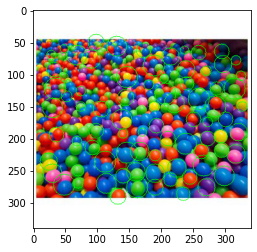

In [ ]:
image2 = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel. difumina la imagen para agrupar mas 
#  tonos en un mismo circulo
gray_blurred2 = cv.blur(gray2, (1, 1))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred2,
                                   cv.HOUGH_GRADIENT, 
                                   1, #dp
                                   20, #distancia minima entre puntos
                                   param1 = 20,
                                   param2 = 18, #cuanto mas pequeño, mayor cant de circulo
                                   minRadius = 6, 
                                   maxRadius = 18)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
    cont=0  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
    
        # Draw the circumference of the circle.
        cv.circle(image2, (a, b), r, (0, 255, 0), 1)
        cont+=1
        
    
    #cv2_imshow(image)
    plt.imshow(image2)
    cv.imwrite("/content/drive/MyDrive/GoogleColab/PelotasID_2.jpg",image)
    
    print ("El programa identificó", str(cont),"Circulos")


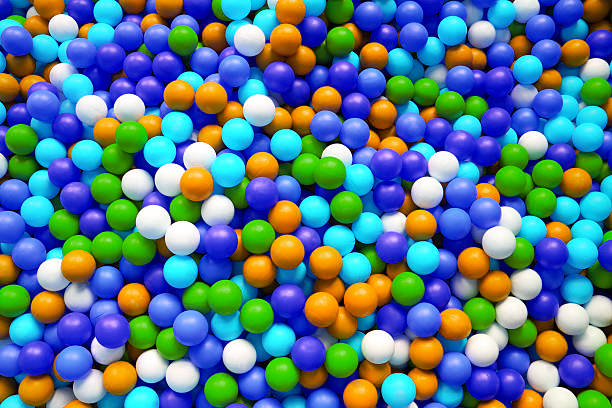

In [ ]:
#DETECCION DE BORDES
from google.colab.patches import cv2_imshow
image3 = io.imread("/content/drive/MyDrive/GoogleColab/pelotas_RBY.jpg")
gray3 = cv.cvtColor(res, cv.COLOR_BGR2GRAY)

#Detección de bordes con Canny --- (Imagen_gris, umbral_min, umbral_max)
canny = cv.Canny(gray3, 14, 150)

#Mejoramiento de la imagen aplicando Dilate (dilatación) y Erode(erosión)
#Dilatación agrega pixeles al borde y Erosión los quita
canny = cv.dilate(canny, None, iterations=1)
canny = cv.erode(canny, None, iterations=1)

cnts,_ = cv.findContours(canny, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
#-1 significa dibuje todos los contornos
cv.drawContours(image, cnts, -1, (0,255,0), 1)

for c in cnts:
  #Epsilon al 1%, muy preciso, si aumenta, disminuye la precisión
  #Perimetro
  epsilon = 0.01*cv.arcLength(c,True)
  #Aproximación a poligono de forma conocida
  approx = cv.approxPolyDP(c,epsilon,True)
  #vertices encontrados en la figura
  x,y,w,h = cv.boundingRect(approx)
  
  #parametros de putText
  coloText = [255,10,50]
  grosor = 1
  escala = 1.02
  letra =1
 
  if len(approx)==3:
    cv.putText(image3,'Triangulo', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==4:
    aspect_ratio = round(float(w)/h,1)
    #print('aspect_ratio= ', round(aspect_ratio,1))
    if aspect_ratio == 1:
      cv.putText(image3,('Cuadrado '+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
    else:
      cv.putText(image3,('Rectangulo'+str(aspect_ratio)), (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==5:
    cv.putText(image3,'Pentagono', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)==6:
    cv.putText(image3,'Hexagono', (x,y+100),letra,escala,(coloText),grosor)
  
  if len(approx)>10:
    cv.putText(image3,'Circulo', (x,y+100),letra,escala,(coloText),grosor)
  
  #parametros de drawContourns
  colorC = [0,0,255]
  grosorC =2
  
  cv.drawContours(image3, [approx], 0, colorC, grosorC)

cv2_imshow(res)

El programa identificó 80 Circulos


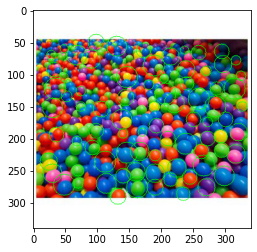

In [ ]:
image2 = io.imread("/content/drive/MyDrive/GoogleColab/figPelotas.jpg")
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)

# Convert to grayscale.
gray2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel. difumina la imagen para agrupar mas 
#  tonos en un mismo circulo
gray_blurred2 = cv.blur(gray2, (1, 1))
  
# Apply Hough transform on the blurred image.
detected_circles = cv.HoughCircles(gray_blurred2,
                                   cv.HOUGH_GRADIENT, 
                                   1, #dp
                                   20, #distancia minima entre puntos
                                   param1 = 20,
                                   param2 = 18, #cuanto mas pequeño, mayor cant de circulo
                                   minRadius = 6, 
                                   maxRadius = 18)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
    cont=0  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
    
        # Draw the circumference of the circle.
        cv.circle(image2, (a, b), r, (0, 255, 0), 1)
        cont+=1
        
    
    #cv2_imshow(image)
    plt.imshow(image2)
    cv.imwrite("/content/drive/MyDrive/GoogleColab/PelotasID_2.jpg",image)
    
    print ("El programa identificó", str(cont),"Circulos")
